# Comparative Analysis
In this notebook, we compare ClaP with clustering competitors.

In [21]:
%load_ext autoreload
%autoreload 2
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
import numpy as np
import pandas as pd

pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
import seaborn as sns

from aeon.visualisation import plot_critical_difference
from external.MCM import MCM
from wand.image import Image

sns.set_theme()
sns.set_color_codes()

import os
import sys

sys.path.append("../../")

Let's choose a score for evaluation (AMI).

In [23]:
eval_score = "ami_score"

Let's load the scores from the different methods.

In [24]:
c1 = ["KShape", "GAK", "Time2Feat", "Agglomerative", "Spectral"]
c2 = ["AutoPlait", "CLaP", "HDP-HSMM", "TICC", "Time2State", "ClaSP2Feat"]

datasets = ["TSSB", "UTSA"] #  
methods, dfs = list(), list()

for candidate_name in c1:
    methods.append((candidate_name, "clustering", f"{candidate_name}.csv.gz"))
    
for candidate_name in c2:
    methods.append((candidate_name, "state_detection", f"{candidate_name}.csv.gz"))

for idx, (name, comp_type, file_name) in enumerate(methods):
    df = []
    
    for d in datasets:
        df.append(pd.read_csv(f"../../experiments/{comp_type}/{d}_{file_name}", compression="gzip"))
    
    df = pd.concat(df)
    df.sort_values(by="dataset", inplace=True)
    dfs.append((name, df))

df_scores = pd.DataFrame()

for name, df in dfs:
    df_scores["dataset"] = df.dataset
    df_scores[name] = df[eval_score]

df_scores.reset_index(drop=True, inplace=True)
df_scores

,dataset,KShape,GAK,Time2Feat,Agglomerative,Spectral,AutoPlait,CLaP,HDP-HSMM,TICC,Time2State,ClaSP2Feat
0,Adiac,0.001,-0.002,0.001,-0.001,-0.002,0.000,0.944,0.307,0.000,0.069,0.854
1,ArrowHead,0.047,0.000,0.013,-0.000,-0.000,0.000,0.945,0.003,0.024,0.454,0.000
2,Beef,0.087,0.171,0.001,0.002,-0.001,0.060,0.910,0.016,0.027,0.461,0.000
3,BeetleFly,0.008,0.005,0.006,0.010,0.014,0.000,0.915,0.004,0.014,0.459,0.000
4,BirdChicken,0.003,0.008,0.020,0.002,0.003,0.000,0.973,0.011,0.014,0.429,0.000
5,CBF,0.238,0.056,0.012,0.004,0.025,0.000,0.951,0.555,0.058,0.566,0.951
6,Cane,0.591,0.019,0.039,0.236,0.039,0.000,0.697,0.095,0.002,0.306,0.482
7,Car,0.013,0.011,0.004,0.001,0.000,0.000,0.796,0.127,0.050,0.460,0.000
8,Chinatown,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
9,ChlorineConcentration,0.000,0.000,-0.000,-0.000,-0.000,0.000,0.000,0.008,0.003,0.097,0.000


Let's calculate the mean/median/std score.

In [25]:
df_scores.iloc[:,1:].mean(axis=0).sort_values(ascending=False).round(3)

CLaP             0.773
ClaSP2Feat       0.478
Time2State       0.402
TICC             0.224
HDP-HSMM         0.201
KShape           0.175
AutoPlait        0.160
Time2Feat        0.129
Agglomerative    0.120
GAK              0.097
Spectral         0.095
dtype: float64

In [26]:
df_scores.iloc[:,1:].median(axis=0).sort_values(ascending=False).round(3)

CLaP             0.896
ClaSP2Feat       0.500
Time2State       0.429
HDP-HSMM         0.129
KShape           0.047
TICC             0.025
Time2Feat        0.013
Agglomerative    0.011
GAK              0.010
Spectral         0.010
AutoPlait        0.000
dtype: float64

In [27]:
df_scores.iloc[:,1:].std(axis=0).sort_values().round(3)

HDP-HSMM         0.225
Time2State       0.227
Spectral         0.241
GAK              0.241
Agglomerative    0.257
Time2Feat        0.264
KShape           0.275
CLaP             0.276
AutoPlait        0.333
TICC             0.344
ClaSP2Feat       0.414
dtype: float64

Let's compute the wins per method.

In [28]:
ranks = df_scores.iloc[:,1:].rank(1, method='min', ascending=False)
means = np.array(ranks.mean(axis=0))
args = np.argsort(means)

In [29]:
for mean, name in zip(means[args], df_scores.columns[1:].to_numpy()[args]):
    print(f"{name}:wins={ranks[ranks[name] == 1].shape[0]} rank={np.round(mean, 1)}")

CLaP:wins=76 rank=1.7
Time2State:wins=7 rank=3.5
ClaSP2Feat:wins=36 rank=4.2
HDP-HSMM:wins=1 rank=5.1
TICC:wins=12 rank=5.2
KShape:wins=7 rank=5.4
Time2Feat:wins=7 rank=6.6
GAK:wins=6 rank=6.9
Agglomerative:wins=6 rank=7.0
Spectral:wins=6 rank=7.2
AutoPlait:wins=10 rank=7.7


Let's plot the CD diagram.

/var/folders/1m/8xt9fm8d1575s4p3vrgccf7r0000gn/T/ipykernel_6492/969689319.py:7: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig("../../figures/cd_clustering_comparative_combined.pdf", bbox_inches="tight")
/Users/ermshaua/miniconda3/envs/clap/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


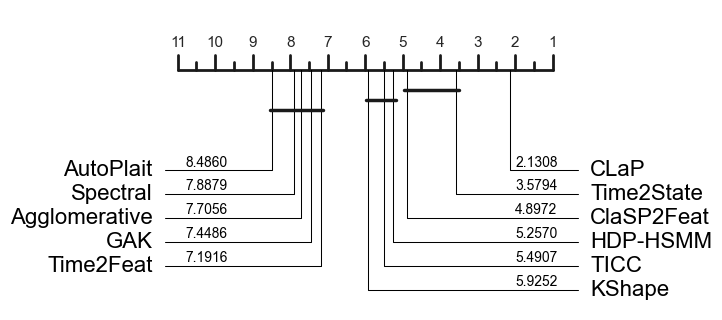

In [30]:
ax = plot_critical_difference(
    scores=df_scores.iloc[:, 1:].to_numpy(),
    labels=df_scores.columns[1:].to_numpy(),
    alpha=0.05
)

plt.savefig("../../figures/cd_clustering_comparative_combined.pdf", bbox_inches="tight")

Let's plot the MCM.

Processing ClaSP2Feat, Time2State:   0%|          | 0/11 [00:00<?, ?it/s]   


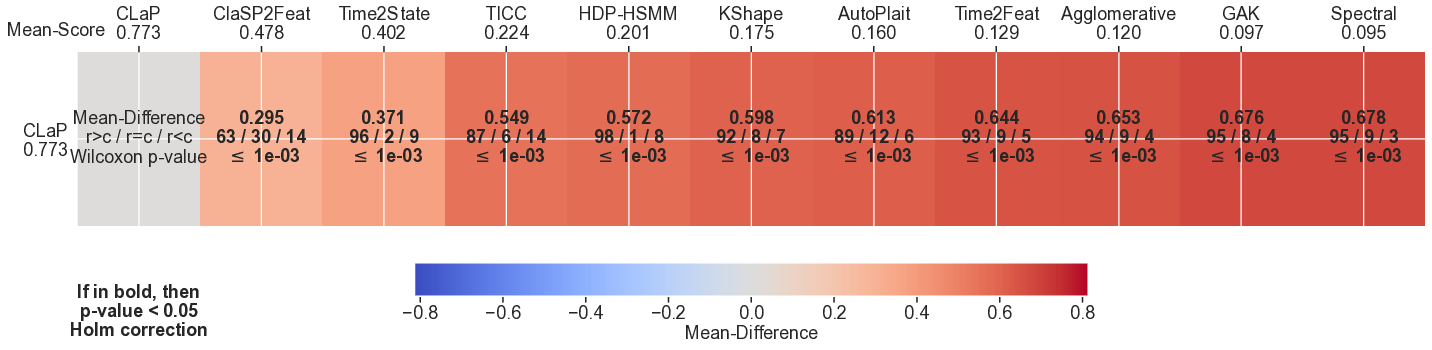

In [31]:
dir_path = "../../figures/"
file_name = "mcm_clustering_comparative_combined"

MCM.compare(
    output_dir=dir_path,
    used_statistic="Score",
    save_as_json=False,
    df_results=df_scores.iloc[:, 1:],
    pdf_savename=file_name,
    load_analysis=False,
    pvalue_correction="Holm",
    row_comparates=("CLaP",),
    fig_size=(20,5),
    font_size=18,
    precision=3
)
Image(filename=os.path.join(dir_path, file_name + ".pdf"))

Let's compute wins/losses against CLaP.

In [32]:
selection = "CLaP"

for rival in df_scores.columns[1:]:
    if rival == selection: continue

    df_pair = df_scores[[selection, rival]]
    pair_ranks = df_pair.rank(1, method='min', ascending=False)

    wins = pair_ranks[(pair_ranks[selection] == 1) & (pair_ranks[rival] == 2)].shape[0]
    losses = pair_ranks[(pair_ranks[selection] == 2) & (pair_ranks[rival] == 1)].shape[0]
    ties = pair_ranks[(pair_ranks[selection] == 1) & (pair_ranks[rival] == 1)].shape[0]

    assert wins + losses + ties == pair_ranks.shape[0]

    print(f"{selection} vs {rival}: (wins/ties/losses): {wins}/{ties}/{losses}")

CLaP vs KShape: (wins/ties/losses): 92/8/7
CLaP vs GAK: (wins/ties/losses): 95/8/4
CLaP vs Time2Feat: (wins/ties/losses): 93/9/5
CLaP vs Agglomerative: (wins/ties/losses): 94/9/4
CLaP vs Spectral: (wins/ties/losses): 95/9/3
CLaP vs AutoPlait: (wins/ties/losses): 89/12/6
CLaP vs HDP-HSMM: (wins/ties/losses): 98/1/8
CLaP vs TICC: (wins/ties/losses): 87/6/14
CLaP vs Time2State: (wins/ties/losses): 96/2/9
CLaP vs ClaSP2Feat: (wins/ties/losses): 63/30/14


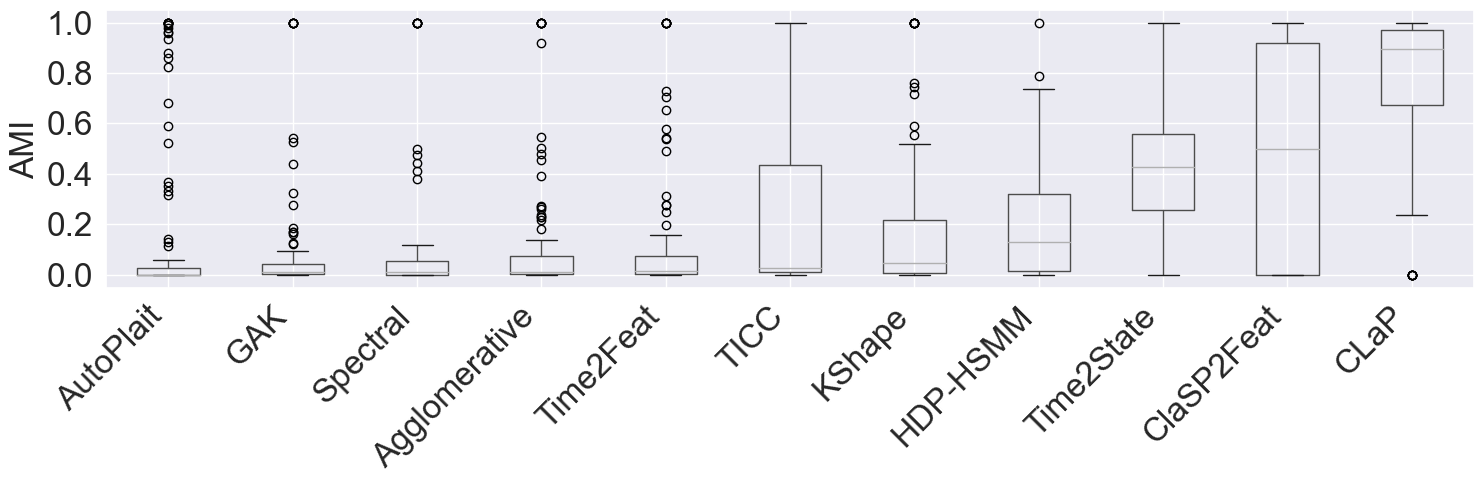

In [33]:
fontsize = 24
_, ax = plt.subplots(figsize=(15, 5))

# Sort by median performance
df_sorted_scores = df_scores[df_scores.iloc[:, 1:].median(axis=0).sort_values().index]

df_sorted_scores.boxplot(ax=ax, rot=90)
ax.set_ylabel("AMI", fontsize=fontsize)

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)

for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)

ax.set_xticklabels(df_sorted_scores.columns, rotation=45, ha="right")
ax.set_yticks(np.round(np.arange(0, 1.0 + .2, .2), 1))

plt.savefig(f"../../figures/bp_clustering_comparative_combined.pdf", bbox_inches="tight")